In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
data=pd.read_csv('C:/Users/Khushi Patidar/Desktop/HR_comma_sep.csv')
data.head(5)

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [3]:
data['left'].value_counts()

0    11428
1     3571
Name: left, dtype: int64

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
satisfaction_level       14999 non-null float64
last_evaluation          14999 non-null float64
number_project           14999 non-null int64
average_montly_hours     14999 non-null int64
time_spend_company       14999 non-null int64
Work_accident            14999 non-null int64
left                     14999 non-null int64
promotion_last_5years    14999 non-null int64
Department               14999 non-null object
salary                   14999 non-null object
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


### Creating new dataset for categorical data bt using .copy() method

In [5]:
dummies=data.select_dtypes(include=['object']).copy()

In [6]:
dummies.head(5)

,Department,salary
0,sales,low
1,sales,medium
2,sales,medium
3,sales,low
4,sales,low


In [7]:
department=dummies['Department'].value_counts()
print(department)

sales          4140
technical      2720
support        2229
IT             1227
product_mng     902
marketing       858
RandD           787
accounting      767
hr              739
management      630
Name: Department, dtype: int64


In [8]:
data.shape

(14999, 10)

In [9]:
dummies['Department'].value_counts().count()

10

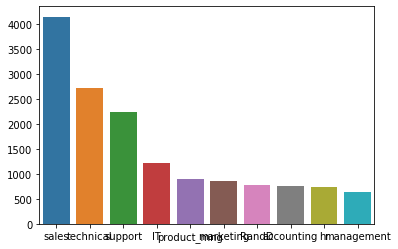

In [10]:
sns.barplot(department.index,department.values)

### Creating dummies of categorial column (Department ,salary) as our model understand only numerical values.

#### There are 3 types of categorical data 
1. Nominal = features where the categories are only labeled without any order of precendence. Ex Male,Female
2. Ordinal = features where the catedories are labeled with order preference. Ex. low,medium,high
3. Continues =  These are numeric variables that have an infinite number of values between any two values. A continuous variable can be numeric or a date/time.

#### Encoding categorical Data  
##### There are different technique to encode categorical features into numeric quantities :-
1. Replacing Values
2. Encoding Labels
3. One-hot Encoding
4. Binary Encoding 5. Backward difference encoding
6. Miscellaneous features
   
   Here I am using One-hot Encoding convert each categorical value into a new column and assign 0/1 value to the column.
   This has the benefit of not weighting a value improperly. Using pandas library and 'get_dummies' method. There are 3
   argument pass here 1st id the dataframe you wnt to encode 2nd is the column argument which lets you specify the columns
   you want to do encoding on, and 3rd, the prefix argument which lets you specify the prefix for the new columns that 
   will be created after encoding.

In [11]:
dummies=pd.get_dummies(dummies,columns=['Department'],prefix='dept')

In [12]:
dummies.sample(n=5, random_state=1)

,salary,dept_IT,dept_RandD,dept_accounting,dept_hr,dept_management,dept_marketing,dept_product_mng,dept_sales,dept_support,dept_technical
11908,medium,0,0,0,0,0,0,0,1,0,0
10508,medium,0,0,0,0,0,0,0,0,1,0
9193,low,0,0,0,0,0,0,0,0,0,1
13087,low,0,0,0,0,0,0,0,0,0,1
506,medium,0,0,0,0,0,0,0,0,1,0


In [13]:
dummies2=pd.get_dummies(dummies.salary,prefix='dept')

In [14]:
dummies2.sample(n=5, random_state=1)

,dept_high,dept_low,dept_medium
11908,0,0,1
10508,0,0,1
9193,0,1,0
13087,0,1,0
506,0,0,1


In [15]:
dummies.head(5)

,salary,dept_IT,dept_RandD,dept_accounting,dept_hr,dept_management,dept_marketing,dept_product_mng,dept_sales,dept_support,dept_technical
0,low,0,0,0,0,0,0,0,1,0,0
1,medium,0,0,0,0,0,0,0,1,0,0
2,medium,0,0,0,0,0,0,0,1,0,0
3,low,0,0,0,0,0,0,0,1,0,0
4,low,0,0,0,0,0,0,0,1,0,0


In [16]:
dummies=dummies.drop(['salary'],axis=1)

### Now adding both columns (dummies and dummies2) in our original data.

In [17]:
data=pd.concat([data,dummies],axis=1)

In [18]:
data=pd.concat([data,dummies2],axis=1)

In [19]:
data.head(5)

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary,...,dept_hr,dept_management,dept_marketing,dept_product_mng,dept_sales,dept_support,dept_technical,dept_high,dept_low,dept_medium
0,0.38,0.53,2,157,3,0,1,0,sales,low,...,0,0,0,0,1,0,0,0,1,0
1,0.80,0.86,5,262,6,0,1,0,sales,medium,...,0,0,0,0,1,0,0,0,0,1
2,0.11,0.88,7,272,4,0,1,0,sales,medium,...,0,0,0,0,1,0,0,0,0,1
3,0.72,0.87,5,223,5,0,1,0,sales,low,...,0,0,0,0,1,0,0,0,1,0
4,0.37,0.52,2,159,3,0,1,0,sales,low,...,0,0,0,0,1,0,0,0,1,0


In [20]:
data.drop(['salary','Department'],axis=1,inplace=True)

In [21]:
data.head(5)

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,dept_IT,dept_RandD,...,dept_hr,dept_management,dept_marketing,dept_product_mng,dept_sales,dept_support,dept_technical,dept_high,dept_low,dept_medium
0,0.38,0.53,2,157,3,0,1,0,0,0,...,0,0,0,0,1,0,0,0,1,0
1,0.80,0.86,5,262,6,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,1
2,0.11,0.88,7,272,4,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,1
3,0.72,0.87,5,223,5,0,1,0,0,0,...,0,0,0,0,1,0,0,0,1,0
4,0.37,0.52,2,159,3,0,1,0,0,0,...,0,0,0,0,1,0,0,0,1,0


### Creating heatmap (from seaborn library)and checking the corelation between traget column(left column)and other feature columns

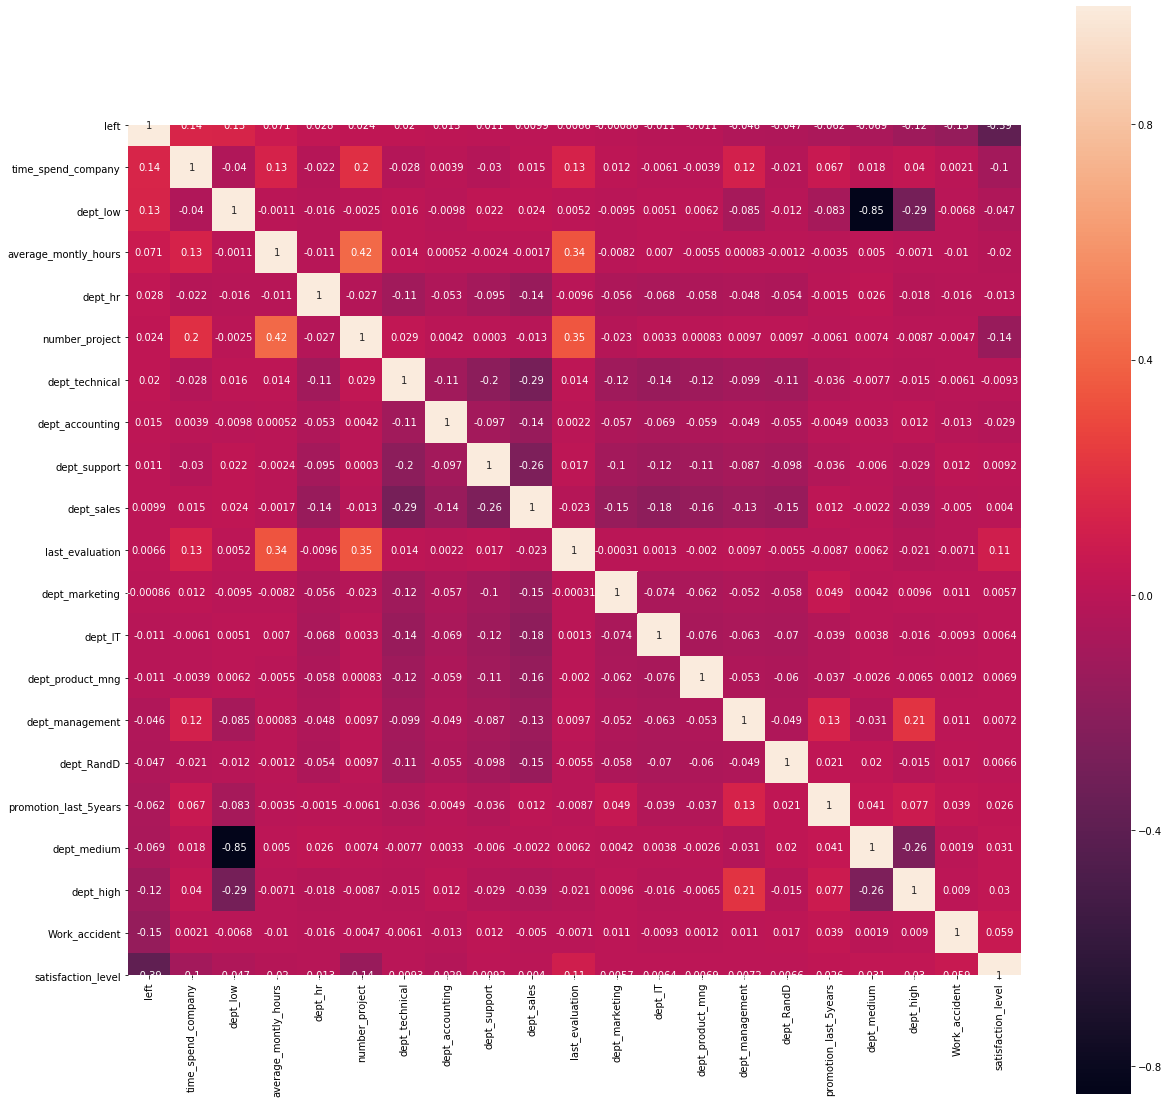

In [22]:
map=data.corr()
x=map.nlargest(21,'left')['left'].index
plt.subplots(figsize=(20,20))
cm = np.corrcoef(data[x].values.T)
sns.heatmap(cm,annot=True, yticklabels=x.values, xticklabels=x.values,square= True)

In [23]:
data.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'dept_IT', 'dept_RandD', 'dept_accounting',
       'dept_hr', 'dept_management', 'dept_marketing', 'dept_product_mng',
       'dept_sales', 'dept_support', 'dept_technical', 'dept_high', 'dept_low',
       'dept_medium'],
      dtype='object')

### Here I am creating model by taking all the x -> feature columns and y -> left column (target column)

In [24]:
"""
y=data['left']
x=data.drop(['left'],axis=1)


from sklearn.model_selection import train_test_split 
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size = 0.25, random_state = 0)
        
"""        

"\ny=data['left']\nx=data.drop(['left'],axis=1)\n\n\nfrom sklearn.model_selection import train_test_split \nxtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size = 0.25, random_state = 0)\n        \n"

In [25]:
"""
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

"""

'\nfrom sklearn.linear_model import LogisticRegression\nmodel = LogisticRegression()\n\n'

In [26]:
"""
model.fit(xtrain, ytrain)

"""

'\nmodel.fit(xtrain, ytrain)\n\n'

In [27]:
"""
predict=model.predict(xtest)

"""

'\npredict=model.predict(xtest)\n\n'

In [28]:
"""
model.score(xtest,ytest)       output :- 0.7861333333333334  (This is accuracy of the model)
"""

'\nmodel.score(xtest,ytest)       output :- 0.7861333333333334  (This is accuracy of the model)\n'

In [29]:
"""
predict=pd.DataFrame(predict,columns=['test'])

"""

"\npredict=pd.DataFrame(predict,columns=['test'])\n\n"

In [30]:
"""
predict['test'].value_counts()              output :- 0    3239
                                                      1     511 
                                                      Name: test, dtype: int64
                                            
"""                                            

"\npredict['test'].value_counts()              output :- 0    3239\n                                                      1     511 \n                                                      Name: test, dtype: int64\n                                            \n"

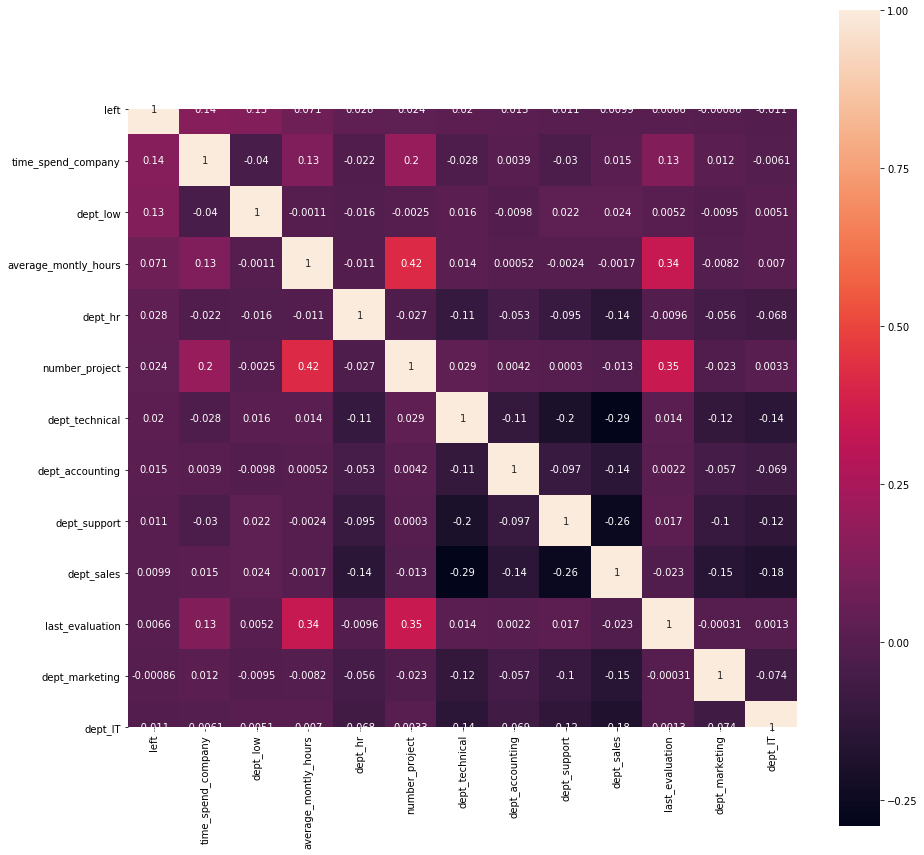

In [31]:
x=map.nlargest(13,'left')['left'].index
plt.subplots(figsize=(15,15))
cm = np.corrcoef(data[x].values.T)
sns.heatmap(cm,annot=True, yticklabels=x.values, xticklabels=x.values,square= True)

## Next model with different feature

### In this model I am taking only those feature columns which has direct impact on left column so that accuracy of model can be increased. From the heatmap we can clearly see that dept_marketing has a negative relation with target column (left column). So neglacting those columns.

In [32]:
x=[ 'last_evaluation', 'number_project','average_montly_hours', 'time_spend_company',  'left', 'dept_accounting','dept_hr', 'dept_marketing', 'dept_sales', 'dept_support', 'dept_technical', 'dept_low']
y=data['left']   

In [33]:
from sklearn.model_selection import train_test_split 
 xtrain, xtest, ytrain, ytest = train_test_split(  data[x], y, test_size = 0.25, random_state = 0)

In [34]:
from sklearn.linear_model import LogisticRegression
model=LogisticRegression()
model.fit(xtrain,ytrain)

C:\Users\Khushi Patidar\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [35]:
predict=model.predict(xtest)

In [36]:
model.score(xtest,ytest)      #acuurary is increased

1.0

In [37]:
predict=pd.DataFrame(predict,columns=['test'])

In [38]:
predict['test'].value_counts()

0    2881
1     869
Name: test, dtype: int64